In [2]:
# Using CNNs with cifar10 
# https://en.wikipedia.org/wiki/CIFAR-10
# The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 45s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

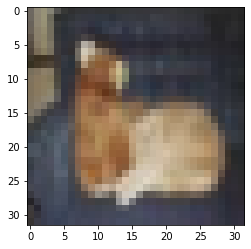

In [16]:
plt.imshow(x_train[17])

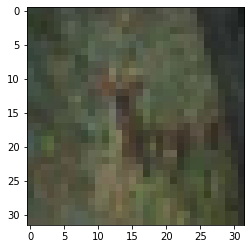

In [18]:
plt.imshow(x_train[10])

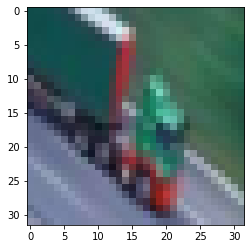

In [19]:
plt.imshow(x_train[50])

In [5]:
# Scale images

x_train = x_train/255
x_test = x_test/255

In [6]:
# One hot encoding

from keras.utils import to_categorical

In [7]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [9]:
# Model defintion

model = Sequential()
# Conv layer 1 -> 3 colour channels
model.add(Conv2D(filters=32, kernel_size = (4,4),input_shape=(32,32,3), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Conv layer -> 2 3 colour channels
model.add(Conv2D(filters=32, kernel_size = (4,4),input_shape=(32,32,3), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten 2D to 1D
model.add(Flatten())
# Dense layer
model.add(Dense(512,activation='relu'))
# Output classifier
model.add(Dense(10,activation='softmax'))
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [12]:
# Model fitting

model.fit(x_train,y_cat_train, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2397 - accuracy: 0.5637
Epoch 2/5
50000/50000 [==============================] - 61s 1ms/step - loss: 1.0434 - accuracy: 0.6356
Epoch 3/5
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9150 - accuracy: 0.6835
Epoch 4/5
50000/50000 [==============================] - 61s 1ms/step - loss: 0.8194 - accuracy: 0.7193
Epoch 5/5
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7474 - accuracy: 0.7444


In [14]:
# Evaluation

model.metrics_names
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 303us/step


[1.0072164520263671, 0.6775000095367432]

In [15]:
# Predict on unseen images

from sklearn.metrics import classification_report
predicitions = model.predict_classes(x_test)
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1000
           1       0.90      0.68      0.78      1000
           2       0.65      0.55      0.60      1000
           3       0.49      0.55      0.52      1000
           4       0.63      0.66      0.65      1000
           5       0.65      0.50      0.57      1000
           6       0.81      0.72      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.62      0.88      0.73      1000
           9       0.67      0.84      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
# Not so amazing, but can be easily improved